# Logistic Regression Exercise

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

import prepare

In [65]:
# get the data
titanic = prepare.prep_titanic()

# creat baseline colum
titanic["baseline"] = int(titanic.survived.mode())

# fill all the na with the mean
titanic["age"] = titanic.age.fillna(titanic.age.mean())

titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,S,1,1,0,1,0


In [66]:
# split the data
train, validate, test = prepare.split_data_(df=titanic, stratify_col="survived", random_state=95)
len(train), len(validate), len(test)

(534, 178, 179)

1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [67]:
age_choices = train.age.value_counts().sort_index().index
age_weights = train.age.value_counts(normalize=True).sort_index().values
count_of_NaN = train.age.value_counts(dropna=False).head(1).values[0]

np.random.choice(age_choices)


56.0

In [68]:
# let start by running out baseline
baseline_acc_score = accuracy_score(train.survived, train.baseline)
baseline_acc_score

0.6161048689138576

In [69]:
# separate features from target
xTrain = train[["age", "fare", "pclass"]]
yTrain = train.survived

# validate
xVal = validate[["age", "fare", "pclass"]]
yVal= validate.survived

In [70]:
# Create modle
logReg = LogisticRegression(C= 1.0, random_state=95)

# fit model
logReg.fit(xTrain, yTrain)

LogisticRegression(random_state=95)

In [87]:
# make prediction
y_pred = logReg.predict(xTrain)

# check prediction probability
y_pred_proba = logReg.predict_proba(xTrain)

# get accuracy score
print("train acc score:",logReg.score(xTrain, yTrain))
confusion_matrix(yTrain, y_pred)

train acc score: 0.6947565543071161


array([[287,  42],
       [121,  84]])

In [86]:
# validate

print("validation acc score:",logReg.score(xVal, yVal))

validation acc score: 0.7359550561797753


- **My test performs better than my baseline**

2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [90]:
# separate features from target
xTrain = train[["age", "fare", "pclass", "sex_male"]]
yTrain = train.survived

# validate
xVal = validate[["age", "fare", "pclass", "sex_male"]]
yVal= validate.survived

In [137]:
def logistic_reg(xTrain, yTrain,xVal, yVal, c):
    # Create modle
    logReg = LogisticRegression(C= c, random_state=95)

    # fit model
    logReg.fit(xTrain, yTrain)
    
    # make prediction
    y_pred = logReg.predict(xTrain)

    # check prediction probability
    y_pred_proba = logReg.predict_proba(xTrain)

    # get accuracy score
    train_score = logReg.score(xTrain, yTrain)
        
    # validate
    validation_score = logReg.score(xVal, yVal)
    
    return train_score, validation_score

In [138]:
train_score, validation_score = logistic_reg(xTrain, yTrain,xVal, yVal, 1)

train_score, validation_score

(0.797752808988764, 0.7696629213483146)

- **This model also does better thanbase line and even better than the previous model**

3. Try out other combinations of features and models.

In [139]:
# separate features from target
xTrain = train[["age", "fare", "pclass", "sex_male", "embarked_Q", "embarked_S", "alone"]]
yTrain = train.survived

# validate
xVal = validate[["age", "fare", "pclass", "sex_male", "embarked_Q", "embarked_S", "alone"]]
yVal= validate.survived

In [140]:
train_score, validation_score = logistic_reg(xTrain, yTrain,xVal, yVal, 1)

train_score, validation_score

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8033707865168539, 0.7921348314606742)

4. Use you best 3 models to predict and evaluate on your validate sample.

In [141]:
# separate features from target
xTrain = train[["fare", "pclass", "sex_male", "embarked_Q", "embarked_S"]]
yTrain = train.survived

# validate
xVal = validate[["fare", "pclass", "sex_male", "embarked_Q", "embarked_S"]]
yVal= validate.survived

In [184]:
result = []
for i in np.arange(0.0001,1,0.1):
    train_score, validation_score = logistic_reg(xTrain, yTrain,xVal, yVal, i)
    
    output = {
        "C": i,
        "train_score": train_score,
        "validate_score": validation_score
    }
    
    result.append(output)
    
df = pd.DataFrame(result)
df.head()

,C,train_score,validate_score
0,0.0001,0.651685,0.702247
1,0.1001,0.795880,0.764045
2,0.2001,0.797753,0.775281
3,0.3001,0.797753,0.769663
4,0.4001,0.797753,0.769663


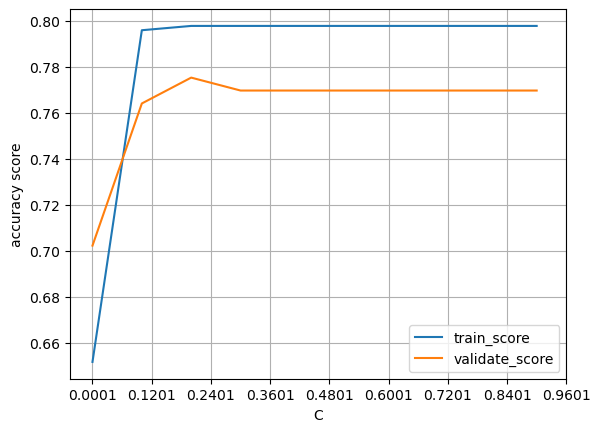

In [218]:
df.set_index("C").plot()
plt.ylabel('accuracy score')
plt.xticks(np.arange(0.0001,1,0.12))
plt.grid()
plt.show()

In [231]:
# best performing model
df[abs(df.train_score - df.validate_score) == abs(df.train_score - df.validate_score).min()]

,C,train_score,validate_score
2,0.2001,0.797753,0.775281


5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [234]:
# validate
xVal = validate[["age", "fare", "pclass", "sex_male", "embarked_Q", "embarked_S", "alone"]]
yVal= validate.survived

# validate
xTest = test[["age", "fare", "pclass", "sex_male", "embarked_Q", "embarked_S", "alone"]]
yTest= test.survived

In [235]:
validation_score, test_score = logistic_reg(xVal, yVal, xTest, yTest, 0.2001)

validation_score, test_score

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8089887640449438, 0.7486033519553073)

**Faily ok but I think it's over fit**